In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Import DF

In [ ]:
# Loading Essential libraries
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/main/dataset_preprocessing.csv',) #dataset hasil preprocessing
df.head()

,username,rate,date,label,sentimen,reviews,produk,text_length,anomaly_score,lowercase_reviews,...,no_number_reviews,no_atribut_reviews,no_repetition_reviews,no_whitespace_reviews,no_banned_reviews,no_slang_reviews,clean_reviews,tokens_reviews,stopword_reviews,stem_reviews
0,nadiadiani_,3,19-03-2021 6:58,non,neutral,"Ketahuilah apa jenis kulitmu dulu,,utamakan gu...",Acnes Creamy Wash,282,1,"ketahuilah apa jenis kulitmu dulu,,utamakan gu...",...,"ketahuilah apa jenis kulitmu dulu,,utamakan gu...",ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dahulu utamakan g...,ketahuilah apa jenis kulitmu dahulu utamakan g...,"['ketahuilah', 'apa', 'jenis', 'kulitmu', 'dah...","['ketahuilah', 'jenis', 'kulitmu', 'utamakan',...",tahu jenis kulit utama produk kandung hydratin...
1,jiminee10,3,31-08-2022 5:02,fake,neutral,Salah satu facial wash dari drugstore yang lay...,Acnes Creamy Wash,167,1,salah satu facial wash dari drugstore yang lay...,...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,"['salah', 'satu', 'facial', 'wash', 'dari', 'd...","['salah', 'facial', 'wash', 'drugstore', 'laya...",salah facial wash drugstore layak coba busa ku...
2,srihastutik1987,3,2024-05-22 22:24,fake,neutral,Efek:memberikan kulit tampak lebih cerah\n Tek...,MS GLOW FACIAL WASH,103,1,efek:memberikan kulit tampak lebih cerah\n tek...,...,efek:memberikan kulit tampak lebih cerah\n tek...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,"['efek', 'memberikan', 'kulit', 'tampak', 'leb...","['efek', 'kulit', 'cerah', 'tekstur', 'lembut'...",efek kulit cerah tekstur lembut nyaman asli ba...
3,Aisyah_18,3,01-11-2021 11:32,fake,neutral,cukup memuaskan dengan harga yang terjangkau ...,Acnes Creamy Wash,104,1,cukup memuaskan dengan harga yang terjangkau ...,...,cukup memuaskan dengan harga yang terjangkau ...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,"['cukup', 'memuaskan', 'dengan', 'harga', 'yan...","['memuaskan', 'harga', 'terjangkau', 'kualitas...",muas harga jangkau kualitas lumayan sedia mark...
4,christinjuniarti,3,29-06-2018 1:01,trusted,neutral,Dr segi packaging sih oke2 aja dan bisa liat w...,Lip Cream LA Girl,431,1,dr segi packaging sih oke2 aja dan bisa liat w...,...,dr segi packaging sih oke aja dan bisa liat w...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dari segi packaging sih oke saja dan bisa liha...,dari segi packaging sih oke saja dan bisa liha...,"['dari', 'segi', 'packaging', 'sih', 'oke', 's...","['segi', 'packaging', 'oke', 'warna', 'produk'...",segi packaging oke warna produk dalam pas dico...


# Modeling LSTM


In [ ]:
max_len = 400  # Max number of words in a sequence
max_features = 20000
# Tokenize the text
df['stem_reviews'] = df['stem_reviews'].astype(str)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['stem_reviews'])
sequences = tokenizer.texts_to_sequences(df['stem_reviews'])

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numerical labels
sentiment_label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
y = df['sentimen'].map(sentiment_label_map).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## A. Solely Word Embedding


In [ ]:
model_A = Sequential(name="Model_A")
model_A.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len, input_shape=(max_len,)))
model_A.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_A.add(Dense(3, activation='softmax'))

model_A.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_A.summary()

Model: "Model_A"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 400, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,823,939 (10.77 MB)

 Trainable params: 2,823,939 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_A_epoch_{epoch:02d}_val_loss_{val_loss:.2f}_val_acc_{val_accuracy:.2f}.keras',
                                   monitor='val_loss',
                                   save_best_only=True)

# Train the model with the callbacks
history_A = model_A.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.4008 - loss: 1.0687 - val_accuracy: 0.6875 - val_loss: 0.8268
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7601 - loss: 0.6555 - val_accuracy: 0.8250 - val_loss: 0.4903
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9063 - loss: 0.2822 - val_accuracy: 0.8750 - val_loss: 0.3498
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9677 - loss: 0.1220 - val_accuracy: 0.8813 - val_loss: 0.3935
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9711 - loss: 0.1009 - val_accuracy: 0.9042 - val_loss: 0.3466
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9823 - loss: 0.0605 - val_accuracy: 0.8979 - val_loss: 0.3790
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9820 - loss: 0.0566 - val_accuracy: 0.8938 - val_loss: 0.3657
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9638 - loss: 0.0916 - val_accuracy: 0.9167 - val_l

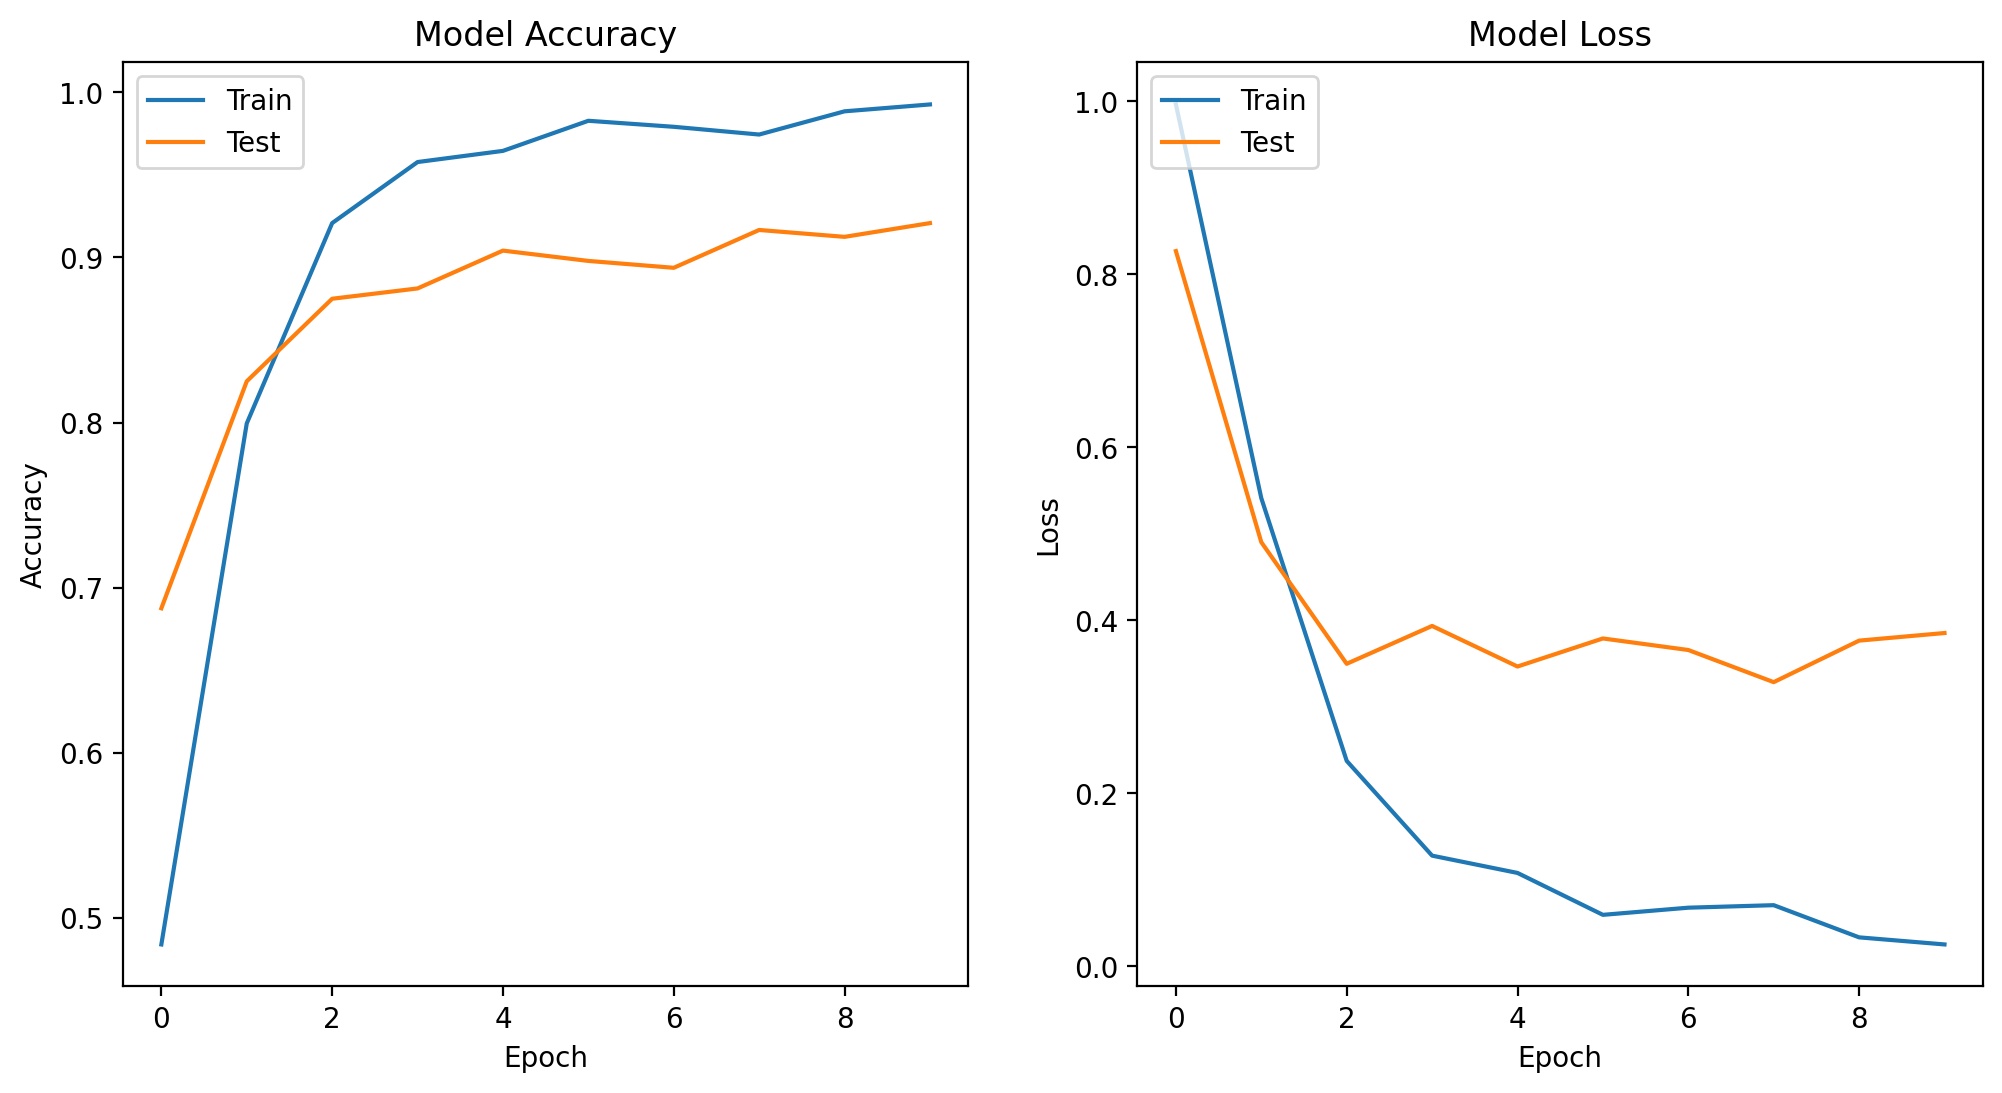

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Test Accuracy: 0.9167
Test Loss: 0.3285
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 465ms/step
Classification Report Model_A:
              precision    recall  f1-score   support

    negative       0.91      0.93      0.92       157
     neutral       0.89      0.91      0.90       168
    positive       0.95      0.91      0.93       155

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



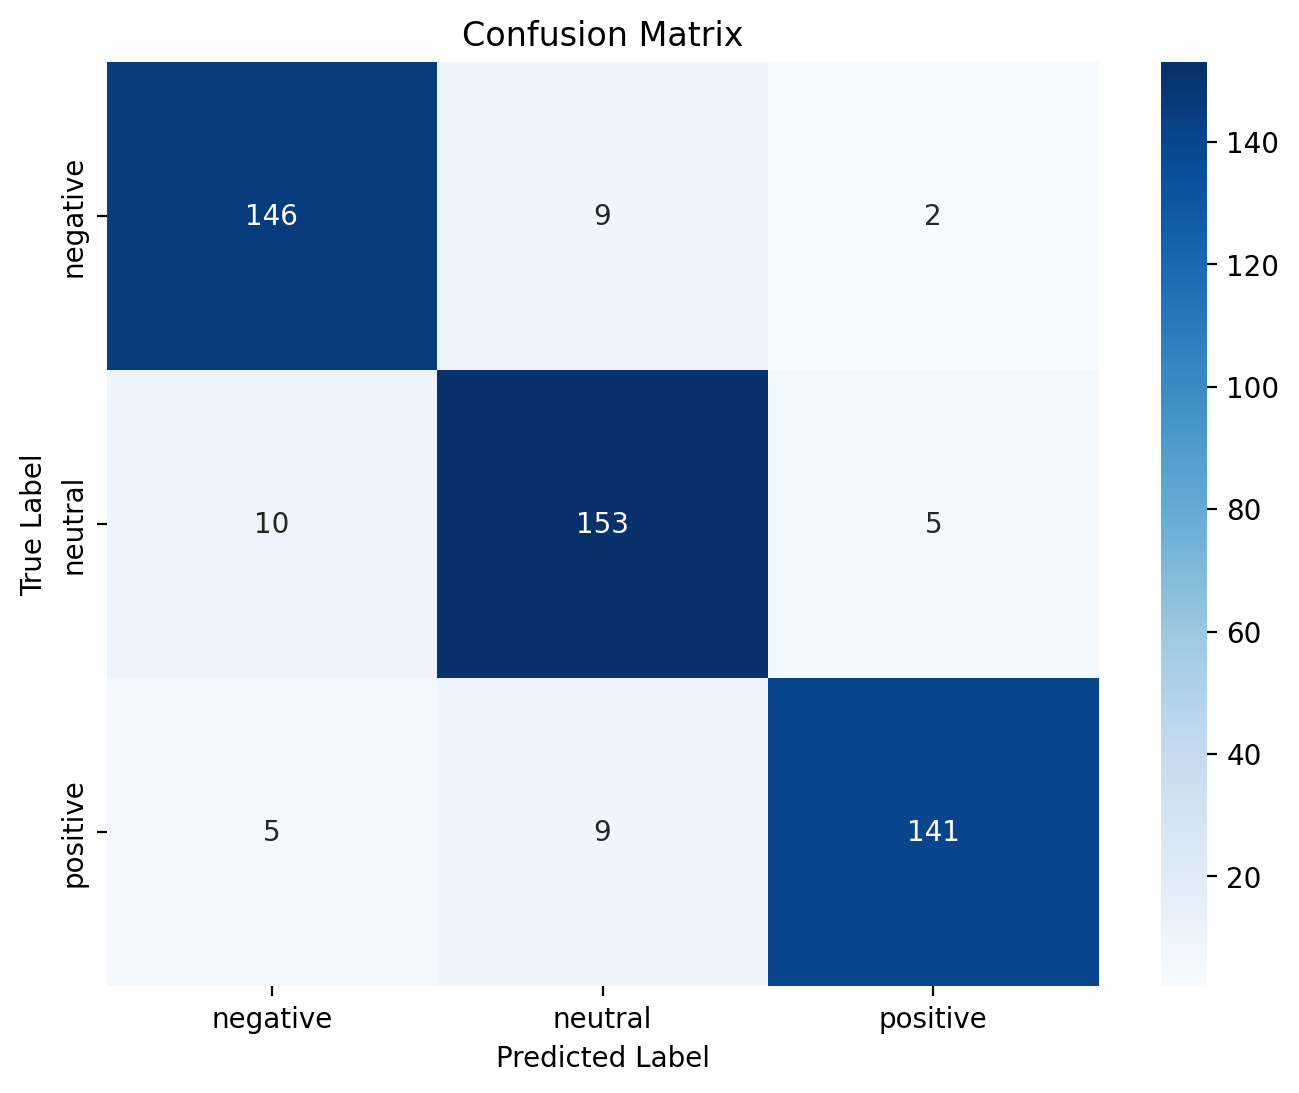

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss, accuracy = model_A.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

# Predict the labels for the test data
y_pred = model_A.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Generate the classification report
print("Classification Report Model_A:")
print(classification_report(y_test, y_pred_classes, target_names=['negative', 'neutral', 'positive']))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## B. Glove


In [ ]:
import numpy as np
import gensim.downloader as api

# Load the GloVe model (trained on English)
glove_model = api.load('glove-wiki-gigaword-100')  # 100-dimensional GloVe embeddings

embedding_dim = 100  # Since we are using 'glove-wiki-gigaword-100', the dimension is 100

# Create an embedding matrix
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < max_features:
        try:
            embedding_vector = glove_model[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            pass



[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

model_B = Sequential(name="Model_B")
model_B.add(Embedding(input_dim=max_features,
                      output_dim=embedding_dim,
                      input_length=max_len,
                      weights=[embedding_matrix],
                      trainable=False))  # Set trainable=False to use the pretrained embeddings as they are
model_B.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_B.add(Dense(3, activation='softmax'))

model_B.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_B.build(input_shape=(None, max_len))

model_B.summary()


Model: "Model_B"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 400, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,235,267 (8.53 MB)

 Trainable params: 235,267 (919.01 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_B_epoch_{epoch:02d}_val_loss_{val_loss:.2f}_val_acc_{val_accuracy:.2f}.keras',
                                   monitor='val_loss',
                                   save_best_only=True)

# Train the model with the callbacks
history_B = model_B.fit(X_train, y_train,
                    epochs=34,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/34
60/60 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.4131 - loss: 1.0706 - val_accuracy: 0.5500 - val_loss: 0.9476
Epoch 2/34
60/60 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5610 - loss: 0.9470 - val_accuracy: 0.5833 - val_loss: 0.8908
Epoch 3/34
60/60 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6225 - loss: 0.8573 - val_accuracy: 0.6042 - val_loss: 0.8310
Epoch 4/34
60/60 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6887 - loss: 0.7437 - val_accuracy: 0.6792 - val_loss: 0.7394
Epoch 5/34
60/60 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7016 - loss: 0.7162 - val_accuracy: 0.7021 - val_loss: 0.6937
Epoch 6/34
60/60 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7517 - loss: 0.6229 - val_accuracy: 0.7250 - val_loss: 0.6561
Epoch 7/34
60/60 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7667 - loss: 0.5790 - val_accuracy: 0.7208 - val_loss: 0.6233
Epoch 8/34
60/60 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7795 - loss: 0.5359 - val_accuracy: 0.7667 - val_loss:

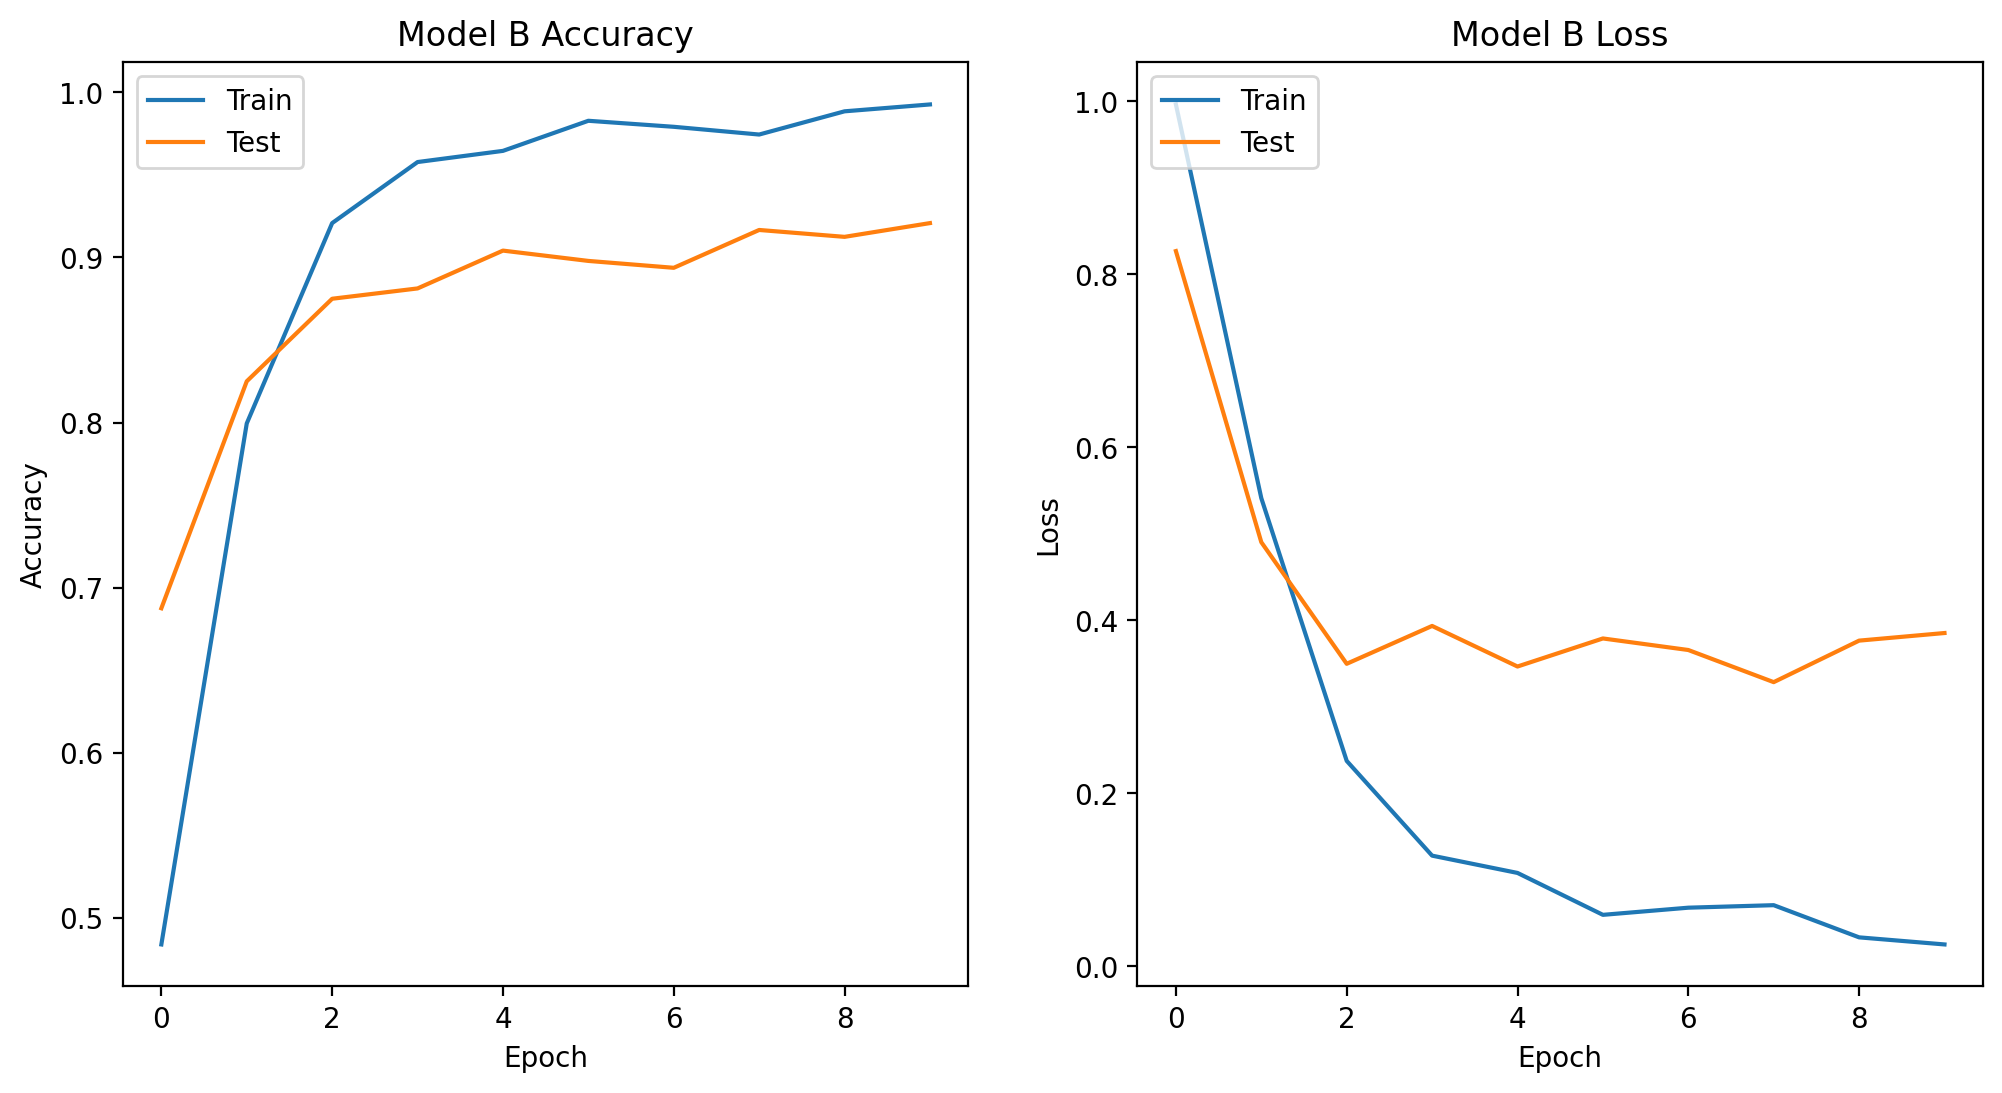

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.title('Model B Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('Model B Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Test Accuracy: 0.8813
Test Loss: 0.3696
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step
Classification Report Model_A:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.86       157
     neutral       0.90      0.83      0.86       168
    positive       0.90      0.94      0.92       155

    accuracy                           0.88       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.88      0.88      0.88       480



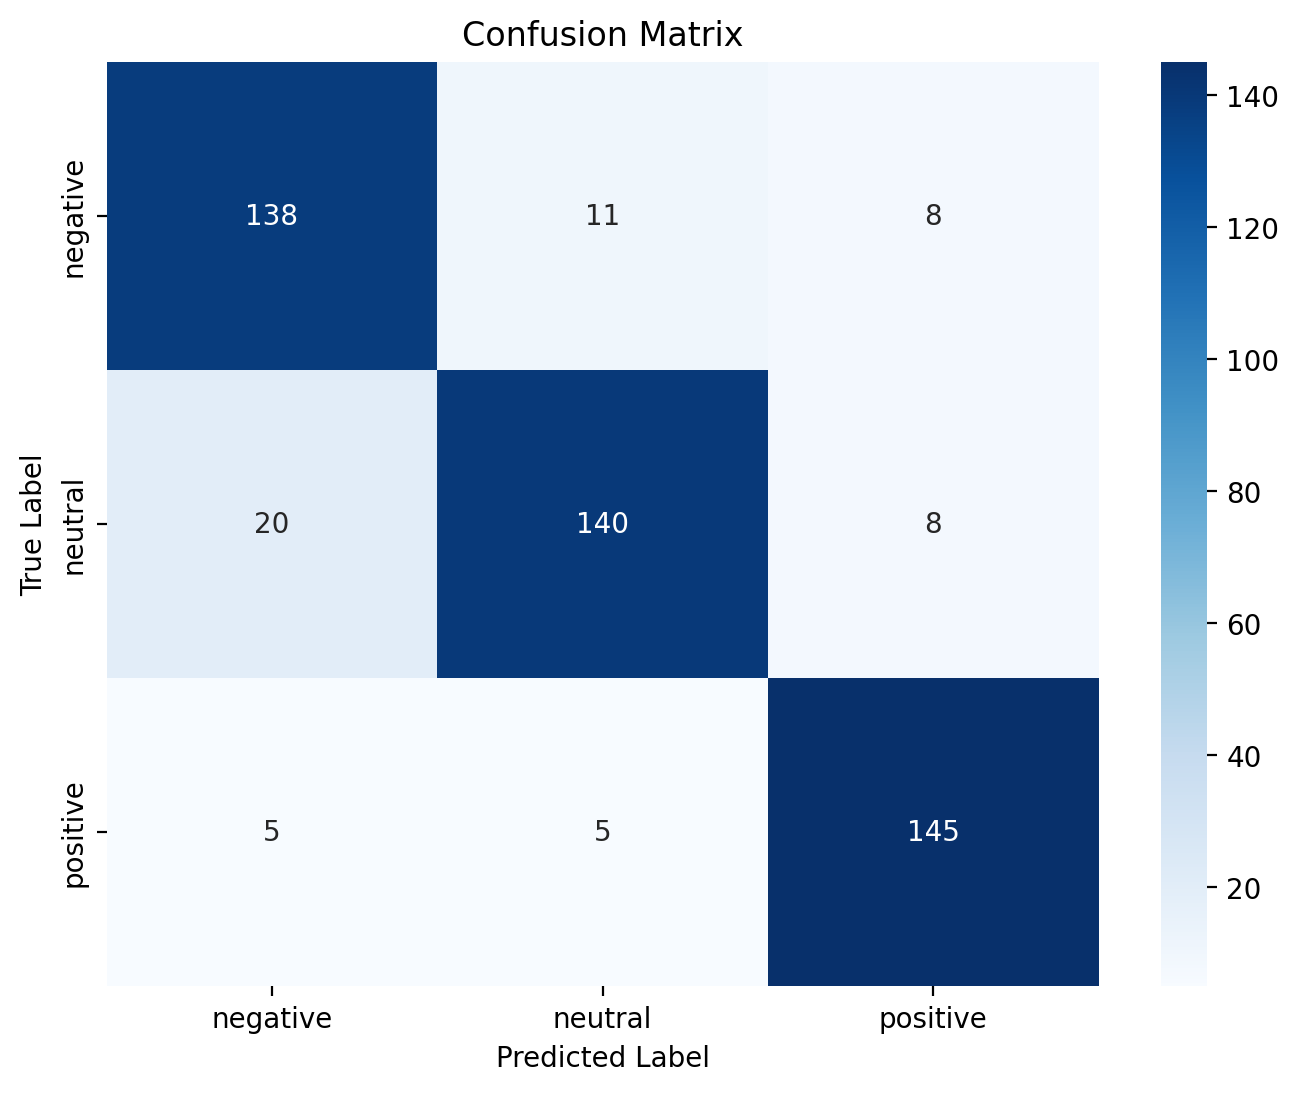

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss, accuracy = model_B.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

# Predict the labels for the test data
y_pred = model_B.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Generate the classification report
print("Classification Report Model_A:")
print(classification_report(y_test, y_pred_classes, target_names=['negative', 'neutral', 'positive']))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix Model B')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Fungsi InputBuat Mencoba

In [ ]:
# from keras.models import load_model

# def predict_sentiment(text, model, tokenizer, max_len):
#     # Tokenize the input text
#     sequences = tokenizer.texts_to_sequences([text])
#     padded_sequences = pad_sequences(sequences, maxlen=max_len)

#     # Predict the sentiment
#     prediction = model.predict(padded_sequences)
#     predicted_class = prediction.argmax(axis=1)[0]
#     confidence = prediction[0][predicted_class] * 100

#     # Map the predicted class to the sentiment label
#     sentiment_label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
#     predicted_label = sentiment_label_map[predicted_class]

#     return predicted_label, confidence

# # Load the tokenizer and model
# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(df['stem_reviews'])  # Ensure the tokenizer is fitted on the training data
# best_model = load_model('best_model.keras')

In [ ]:

# text = input("Enter the text to analyze sentiment: ")
# predicted_label, confidence = predict_sentiment(text, best_model, tokenizer, max_len)

# print(f'Text: {text}')
# print(f'Predicted Sentiment: {predicted_label}')
# print(f'Confidence: {confidence:.2f}%')